# Import modules

In [15]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install libmagickwand-dev
!pip install wand

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagickwand-dev is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [16]:
import pytesseract
from pytesseract import Output
import cv2
from os import listdir
from matplotlib import image
import re
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

from google.colab.patches import cv2_imshow

import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import pytesseract
import pandas as pd
import io
from wand.image import Image as wi

pd.set_option('max_colwidth', 2000)
pd.options.display.max_rows = 500
tf.__version__

'2.2.0'

# Loading dataset

The dataset can be find here https://expressexpense.com/blog/free-receipt-images-ocr-machine-learning-dataset/

In [17]:
path = '/content/drive/My Drive/information extraction from image file/large-receipt-image-dataset-SRD/'
image_name = "1001-receipt.jpg"

Loading image

In [18]:
from PIL import Image
img = cv2.imread(path + image_name)

Function to plot an image

In [19]:
def image_plot(image_data):
  cv2_imshow(image_data)

Print detected text with tesseract 

In [20]:
extracted_text = pytesseract.image_to_string(img, config='-c preserve_interword_spaces=1', lang='eng')

On the original image, the tesseract don't recognize any word.

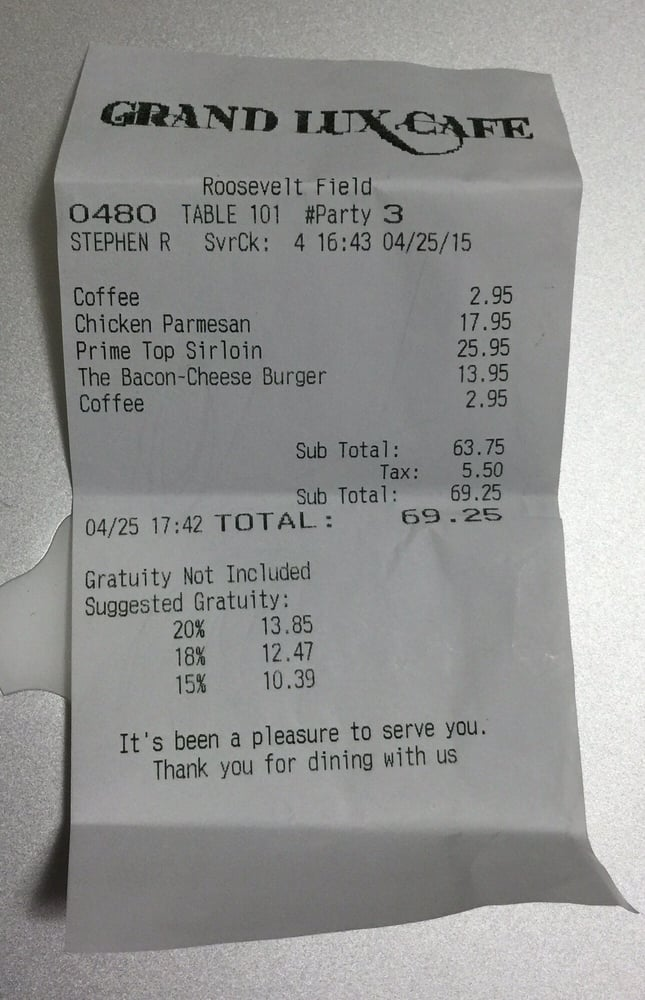

In [21]:
image_plot(img)
print(extracted_text)

# Preprocessing 

To overcome this problem, we can apply some transformation on our image

## One Method

### Resize

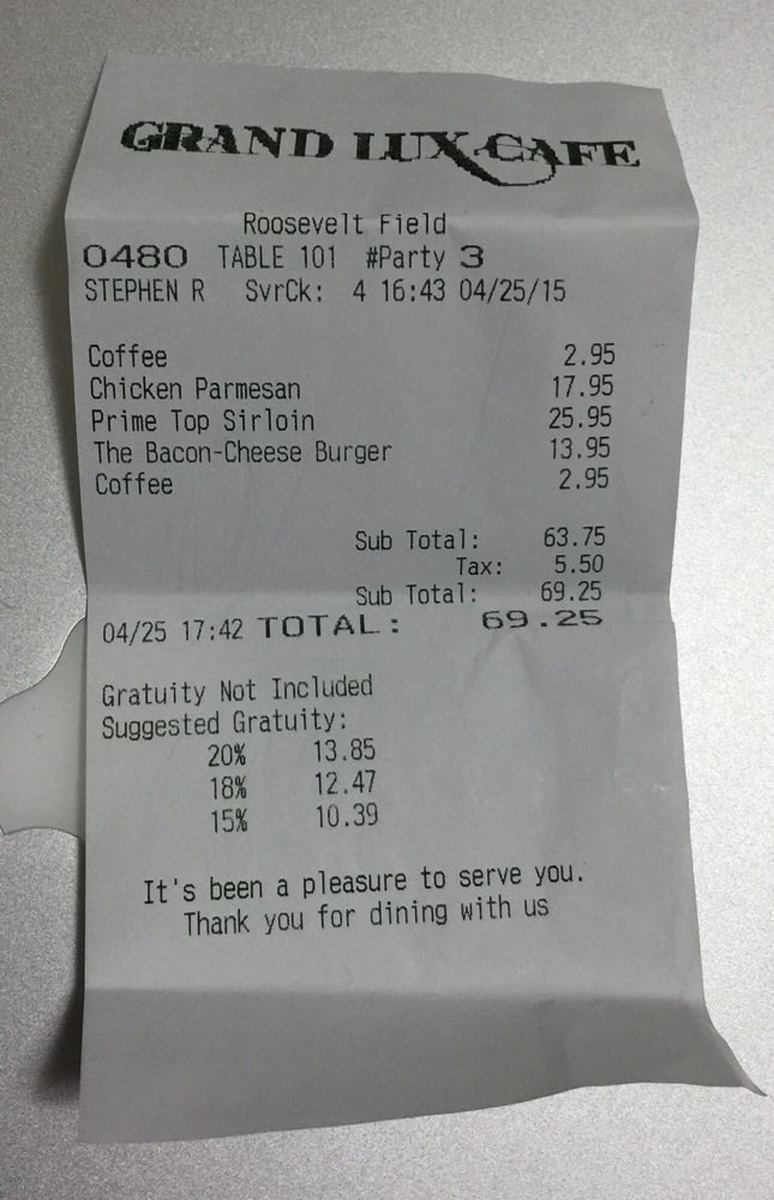

In [22]:
img = cv2.imread(path + image_name)
img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
extracted_text = pytesseract.image_to_string(img, lang = 'eng')
print(extracted_text)
image_plot(img)

### Grayscale

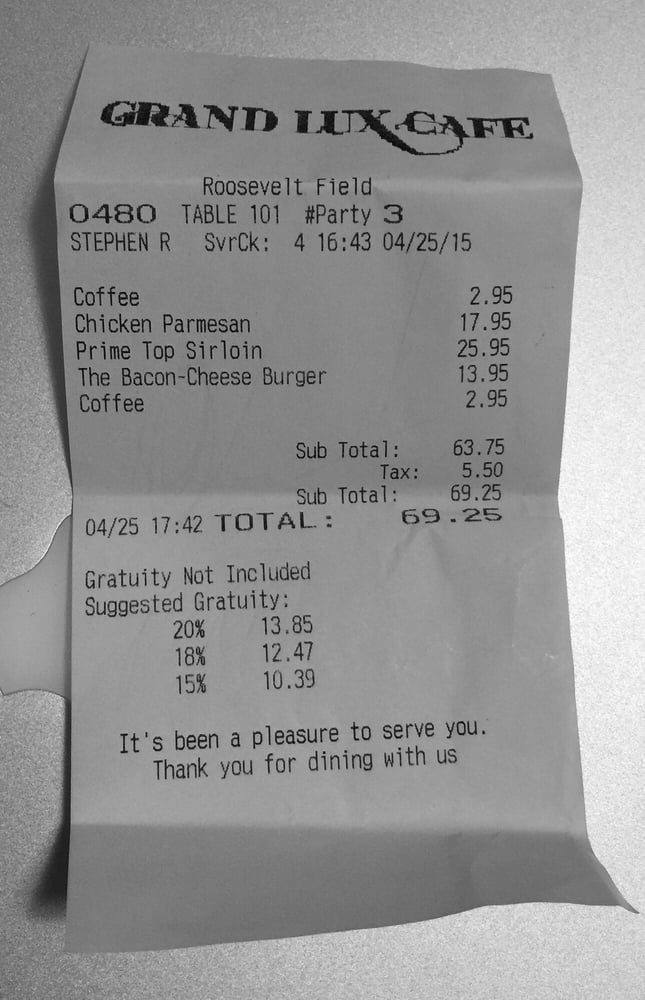

In [23]:
img = cv2.imread(path + image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image_plot(gray)
print(extracted_text)

### Black and white

To convert our image to black and white, weed first convert our image to grayscale and we use a threshold

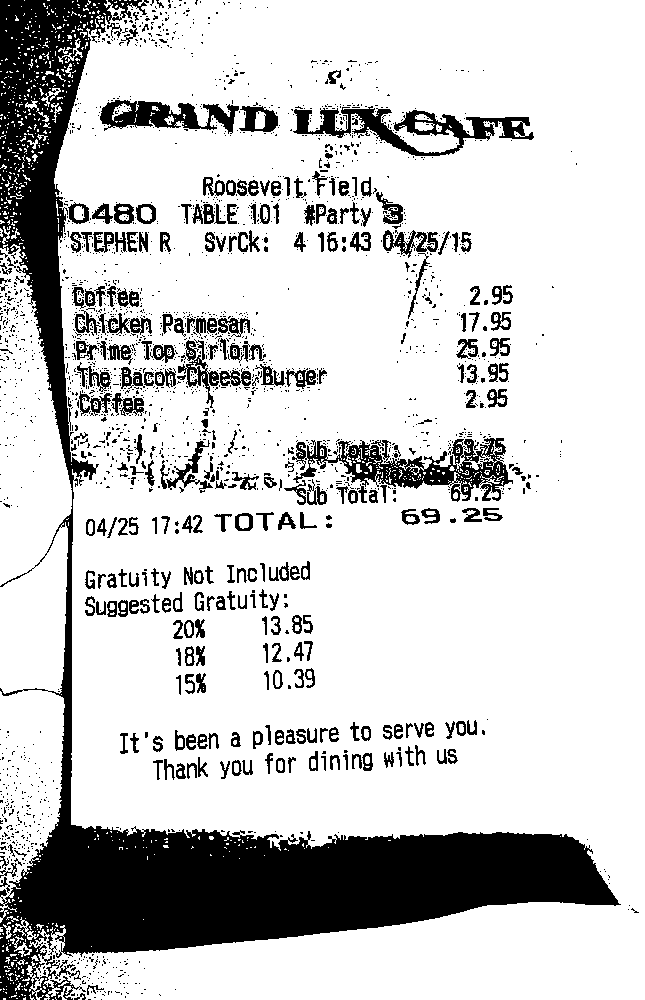

Roosevelt Field,
(0480, TABLE 101 #Party 2
EPHEN R.. SvrCk: 4 16:43 04/25/15

  
 
  
 
    

s 3
A 04/25 17:42 TOTAL =
Gratuity Not Included

Suggested Gratuity:
20% 13.85
18% 12.47
15% 10.39

It's been a pleasure to serve you.
Thank you for dining with us


In [24]:
img = cv2.imread(path + image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
extracted_text = pytesseract.image_to_string(blackAndWhiteImage, lang = 'eng')

image_plot(blackAndWhiteImage)
print(extracted_text)

## Combination

### black and white + resize

We resized the image after converting it into black and withe

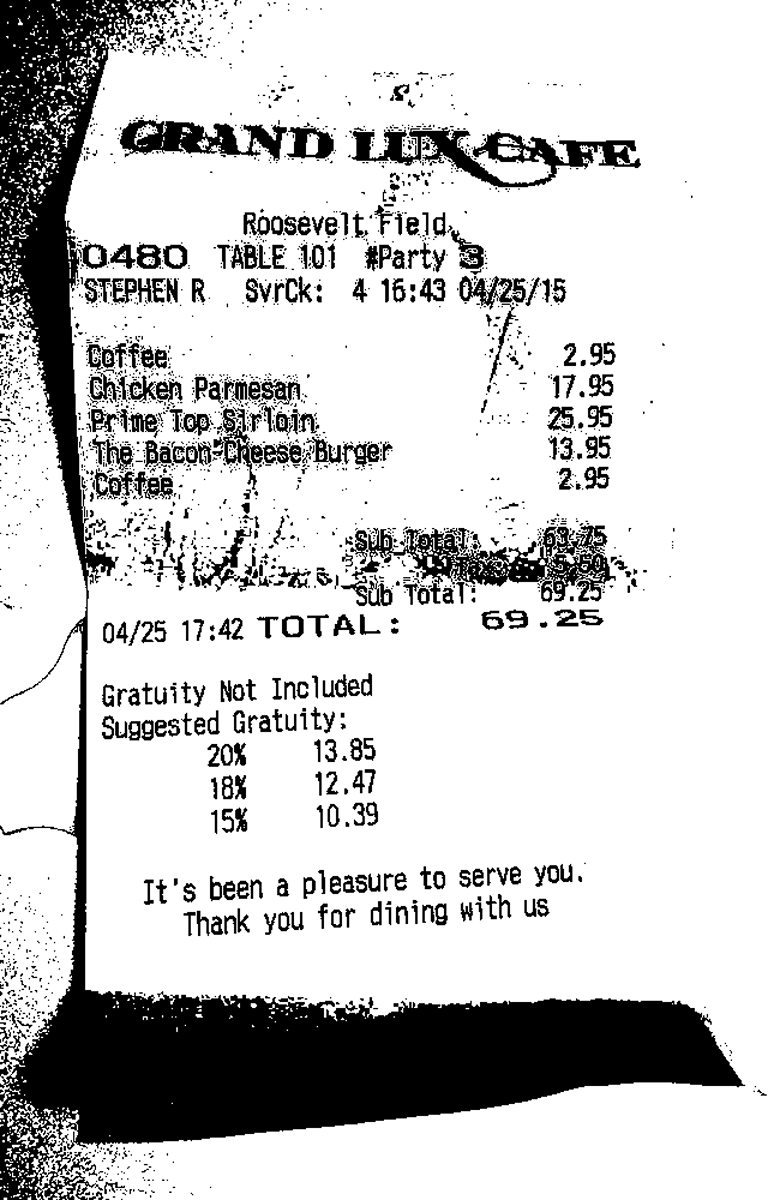

Roosevelt Field |
(480 TALE 101 Party B

HEN R. | SvrCki 4 16:43 04/25/15
¥.

| , “Sti Total
4 04/25 17:42 TOTAL:

  

Gratuity Not Included

Suggested Gratuity:
20% 13.85

18% 12,47
15% 10.39

It’s been a pleasure to serve you.
Thank you for dining with us


In [25]:
blackAndWhiteImage_resized = cv2.resize(blackAndWhiteImage, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
extracted_text = pytesseract.image_to_string(blackAndWhiteImage_resized, lang = 'eng')

image_plot(blackAndWhiteImage_resized)
print(extracted_text)

First we resized the image and we convert it to black and white after

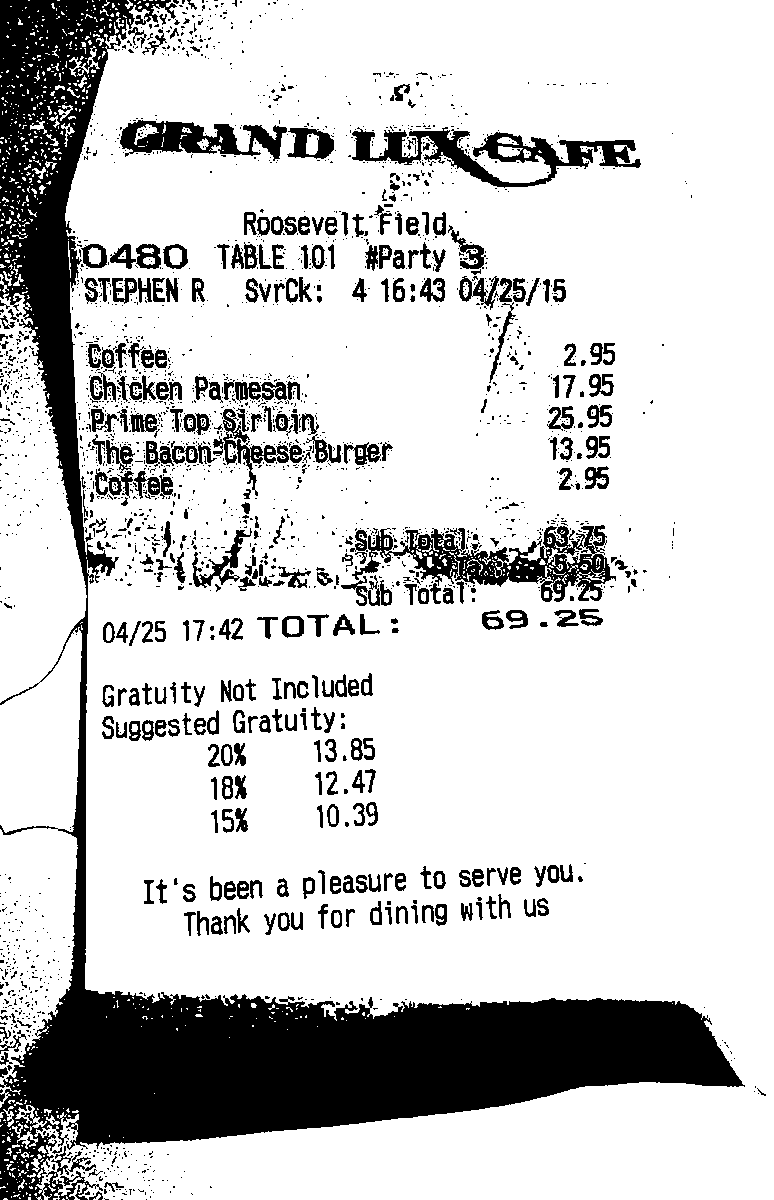

. ™ ib Totat
A 04/25 17:42 TOTAL:

‘69.25

  
  
   
    

Gratuity Not Included

Suggested Gratuity:
20% 13.85
18% 12.47
15% 10.39

It's been a pleasure to serve you.
Thank you for dining with us


In [26]:
img = cv2.imread(path + image_name)
img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
extracted_text = pytesseract.image_to_string(blackAndWhiteImage, lang = 'eng')

image_plot(blackAndWhiteImage)
print(extracted_text)

### grayscale + resize

We resized the image after converting it into grayscale

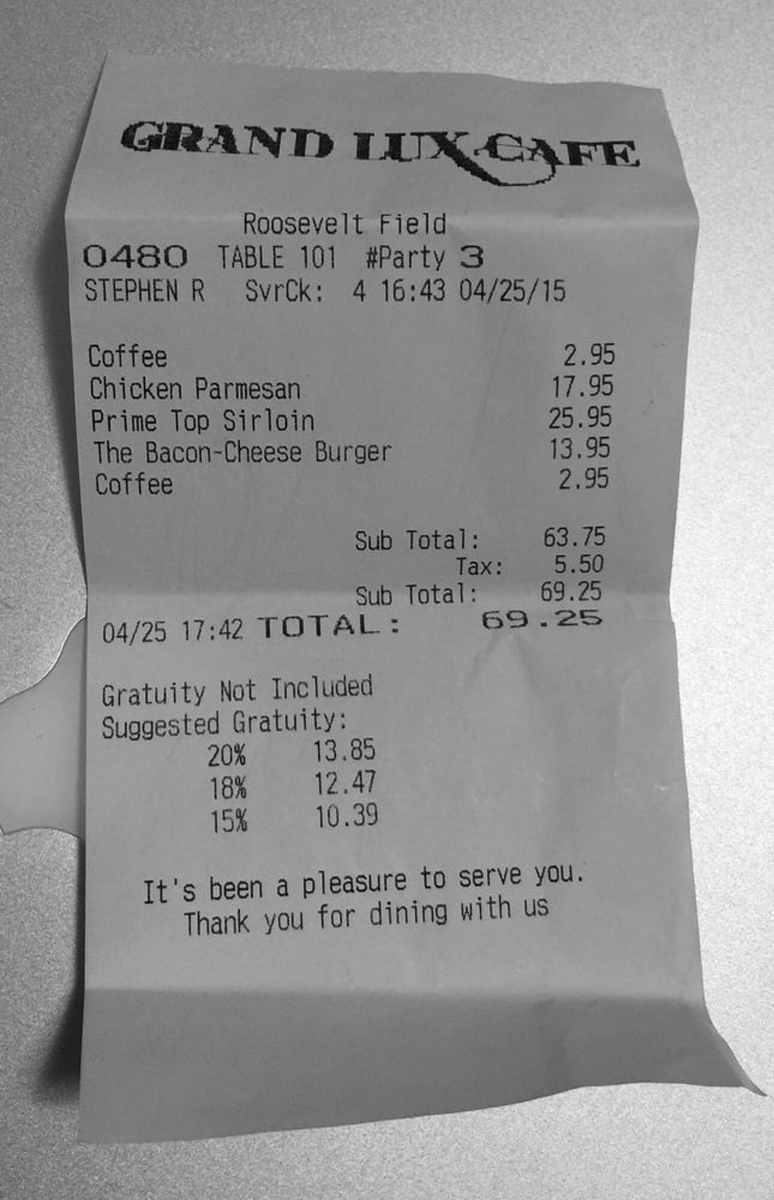

In [27]:
img = cv2.imread(path + image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)

extracted_text = pytesseract.image_to_string(img, lang = 'eng')

image_plot(img)
print(extracted_text)

First we resized the image and we convert it to black and white after

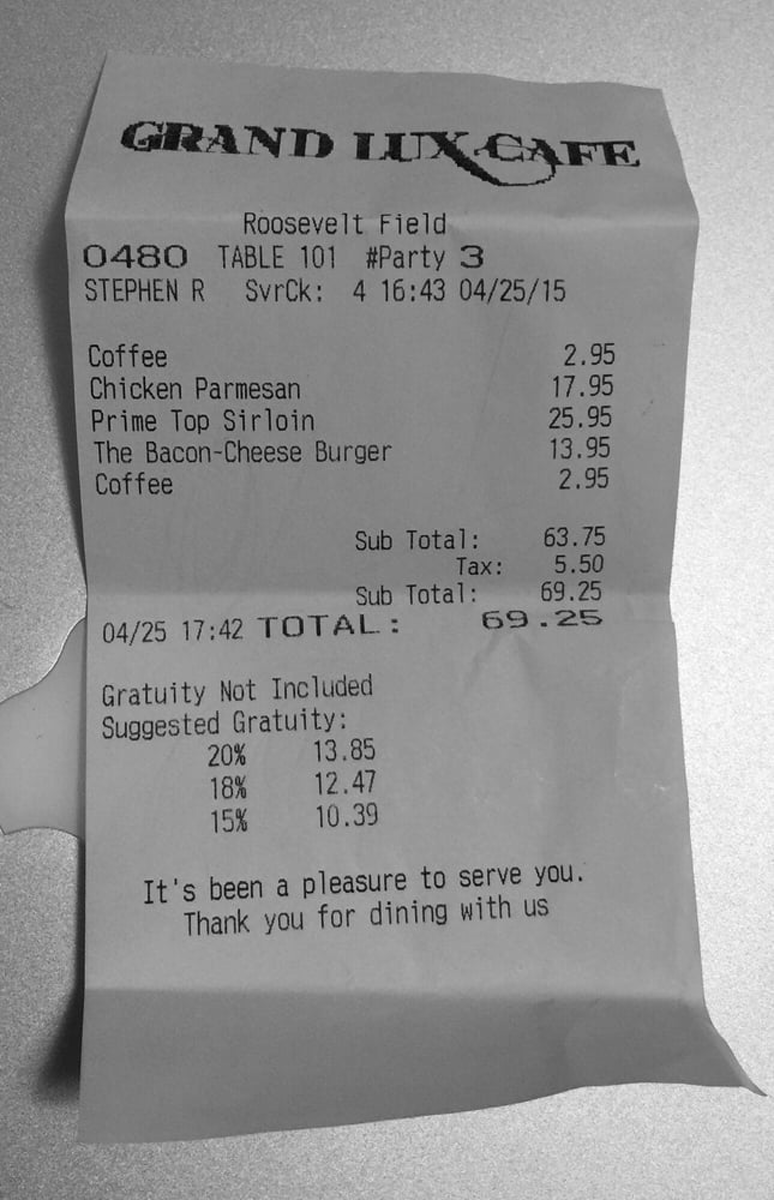

In [28]:
img = cv2.imread(path + image_name)
img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
extracted_text = pytesseract.image_to_string(gray, lang = 'eng')

image_plot(gray)
print(extracted_text)